In [2]:
import numpy as np
import sep

In [5]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [6]:
with fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits") as hdul:
    hdul.info()  
    data = hdul[0].data

Filename: hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


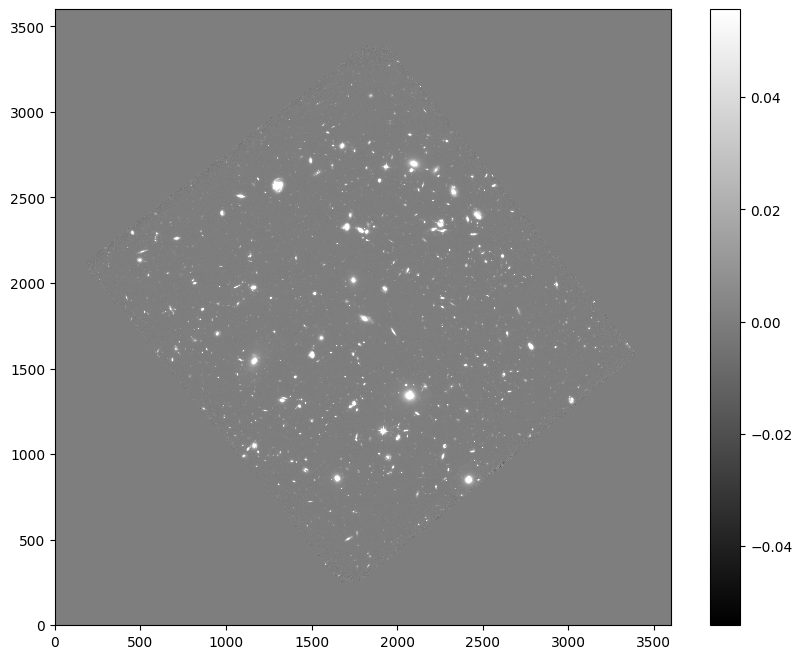

In [71]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [8]:
data = data.byteswap().newbyteorder()

In [9]:
bkg = sep.Background(data)

In [10]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [11]:
bkg_image = bkg.back()

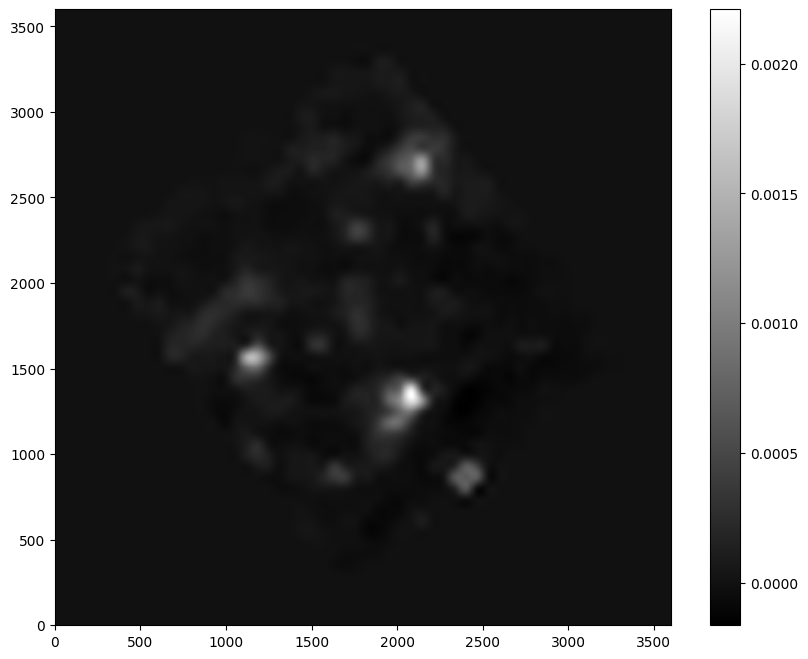

In [12]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [13]:
bkg_rms = bkg.rms()

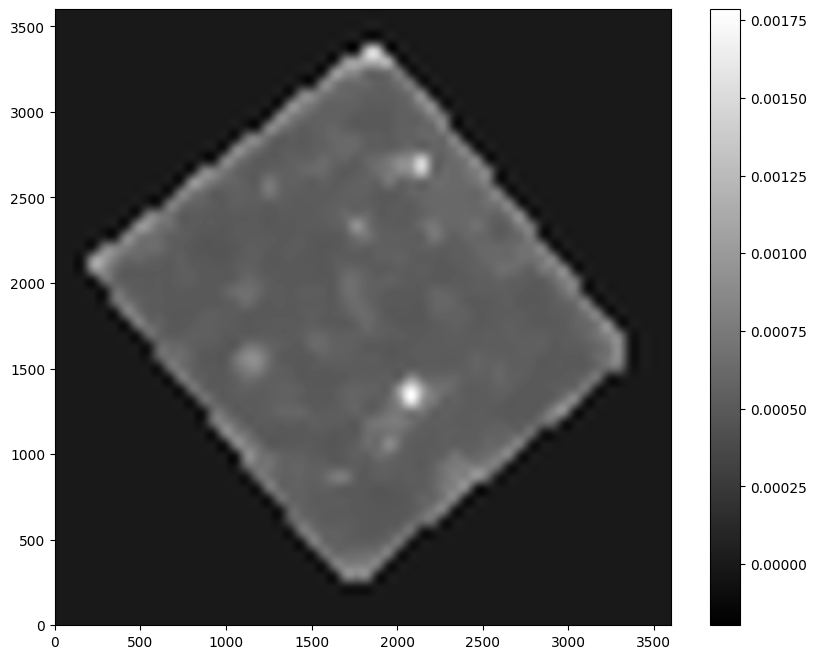

In [14]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [15]:
data_sub = data - bkg

In [16]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [17]:
len(objects)

8643

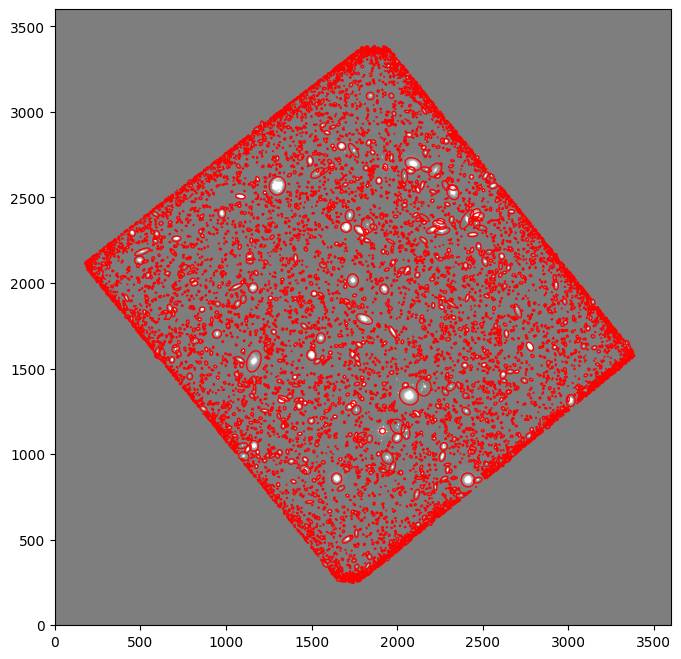

In [18]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)


In [19]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [20]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [21]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


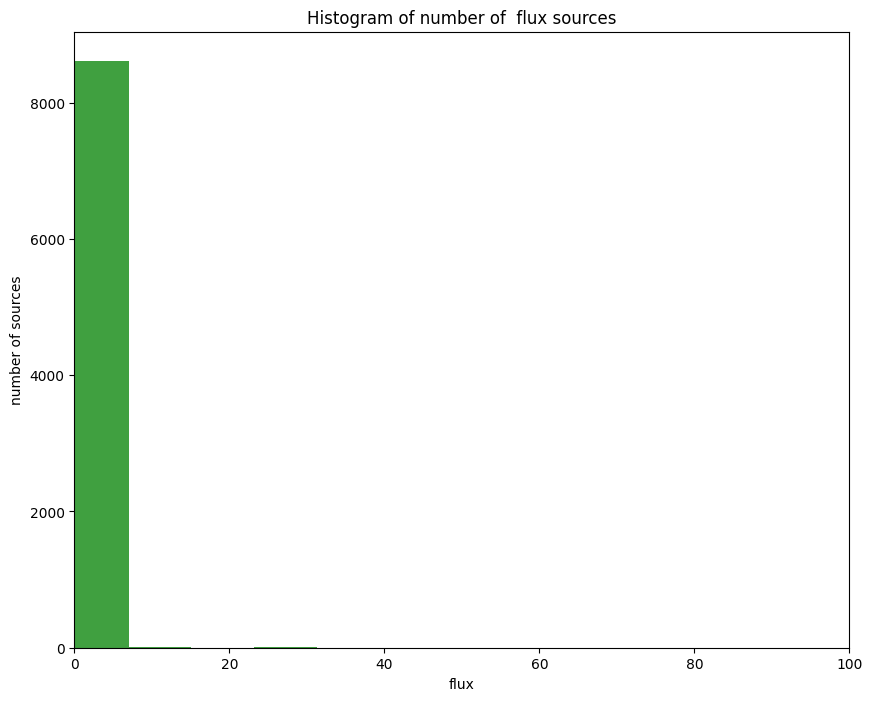

In [22]:
fluxes = objects['flux']
plt.figure(figsize=(10, 8))
plt.hist(flux, bins = 100,alpha = 0.75, color = 'green')
plt.xlim(0, 100)
plt.xlabel('flux')
plt.ylabel('number of sources')
plt.title('Histogram of number of  flux sources')
plt.show()

In [23]:
mean_flux = np.mean(fluxes)
median_flux = np.median(fluxes)
std_flux = np.std(fluxes)

print(f"Mean Flux: {mean_flux}")
print(f"Median Flux: {median_flux}")
print(f"STD Flux: {std_flux}")

Mean Flux: 1.17227448026878
Median Flux: 0.0347491130232811
STD Flux: 17.542063555658334


In [24]:
largest_flux = np.max(fluxes)
print(f"Largest Flux: {largest_flux}")

Largest Flux: 1218.4114990234375


In [31]:
fluxes = objects['flux']
x_coords = objects['x'] 
y_coords = objects['y']

print(f"x_max: {x_coords}")
print(f"y_max: {y_coords}")

x_max: [1737.8231612  1743.38088137 1765.69754404 ... 1865.47835986 1865.88784547
 1856.54064213]
y_max: [ 246.82888027  249.25744868  252.50539983 ... 3382.70733768 3376.85062609
 3376.5143388 ]


In [33]:
index_of_max_flux = np.argmax(fluxes)
x_max = x_coords[index_of_max_flux]
y_max = y_coords[index_of_max_flux]

print(f"x_max: {x_max}")
print(f"y_max: {y_max}")

x_max: 1914.2549094883857
y_max: 1134.3164850742164


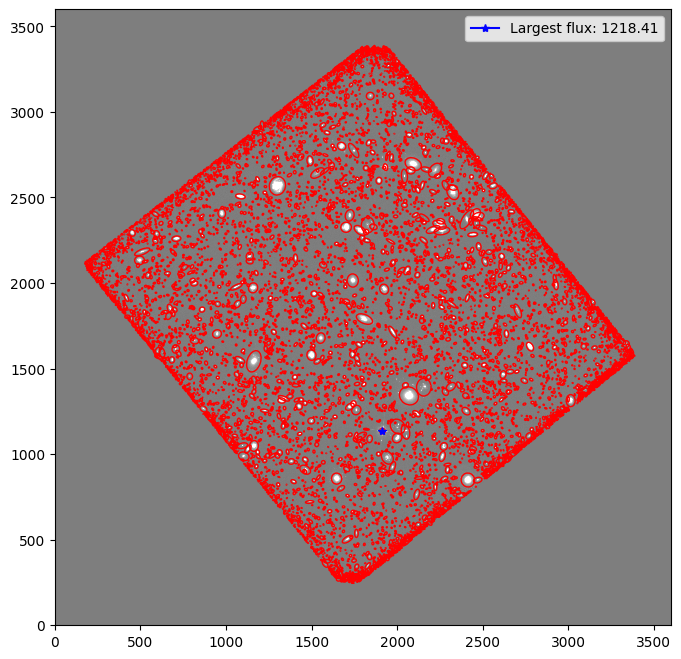

In [34]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy = (objects['x'][i], objects['y'][i]),
                width = 6*objects['a'][i],
                height = 6*objects['b'][i],
                angle = objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
ax.plot(x_max, y_max, color = 'blue', marker = '*', label=f'Largest flux: {largest_flux:.2f}')

plt.legend()
plt.show()

In [38]:
std = (largest_flux -m) / s

print(f"The largest flux is {std} away from the mean")

The largest flux is 22207.826976058022 away from the mean


In [47]:
data_f125w = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')
data_f160w = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits')
data_f105w = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')

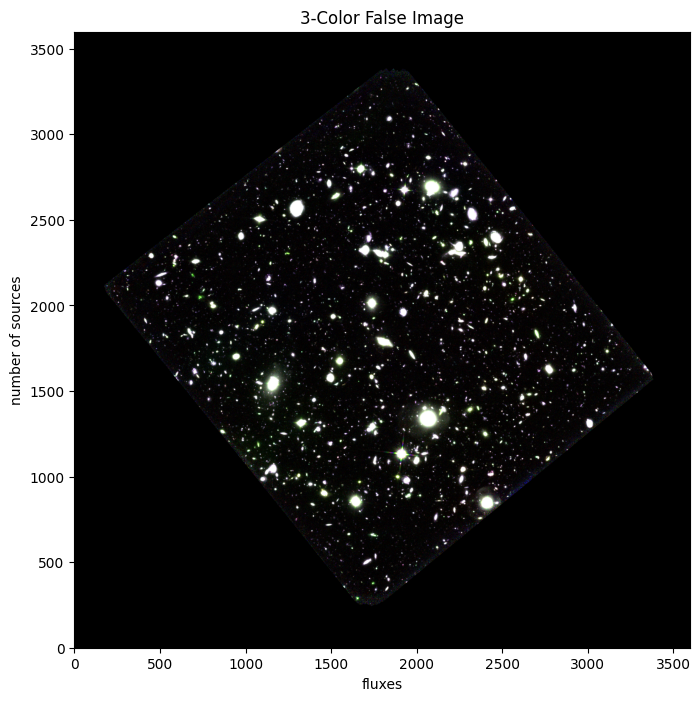

In [74]:
rgb_image = np.stack([data_f125w, data_f160w, data_f105w], axis = -1)

plt.figure(figsize = (10, 8))
plt.imshow(rgb_image, origin='lower')
plt.title('3-Color False Image')
plt.xlabel('fluxes')
plt.ylabel('number of sources')

plt.savefig('3_color_image.png', bbox_inches = 'tight')